In [2]:
# Import all the packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic = pd.read_csv('titanic.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
titanic['Age']= titanic['Age'].fillna(titanic['Age'].mean())

In [8]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [10]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# All important variables

titanic_df = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare', 'Embarked']]

In [20]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,True,False,True
1,1,1,38.000000,1,0,71.2833,False,False,False
2,1,3,26.000000,0,0,7.9250,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,True
887,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,29.699118,1,2,23.4500,False,False,True
889,1,1,26.000000,0,0,30.0000,True,False,False


In [19]:
titanic_df = pd.get_dummies(titanic_df,drop_first=True)

In [29]:
x = titanic_df[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']]

y = titanic_df[['Survived']]

In [30]:
# divide the data in train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [54]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[['Age','Fare']] = sc.fit_transform(x_train[['Age','Fare']])
x_test[['Age','Fare']] = sc.transform(x_test[['Age','Fare']])


In [89]:
# fitting logistic regression model ---> changes from here

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,max_depth=3) # Hyper paraemetre cleaning(max_depth=3) --> tune the number for increase acc,precision and recall
classifier.fit(x_train,y_train) 

RandomForestClassifier(max_depth=3, n_estimators=10)

In [90]:
y_pred = classifier.predict(x_test)

In [91]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [92]:
len(y_pred)

179

In [93]:
# Accuracy check

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

acc = accuracy_score(y_pred,y_test)
cf = confusion_matrix(y_pred,y_test)
precision = precision_score(y_pred,y_test)
reacall = recall_score(y_pred,y_test)

<Axes: >

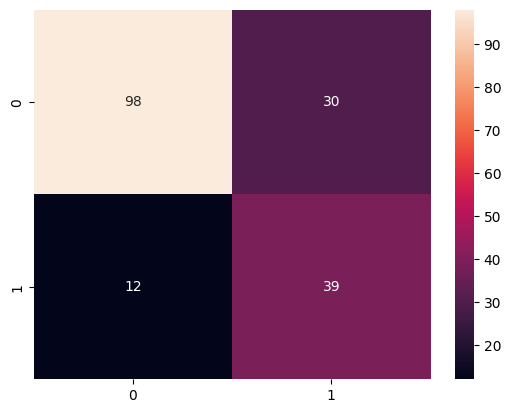

In [94]:
import seaborn as sns
sns.heatmap(cf,annot=True)

In [96]:
print("Accuracy:",acc)
print("CF:",cf)
print("Precision:",precision)
print("Recall:",recall)

Accuracy: 0.7653631284916201
CF: [[98 30]
 [12 39]]
Precision: 0.5652173913043478
Recall: 0.7391304347826086
